In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from wordcloud import WordCloud
import matplotlib.colors as mcolors

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix



import torch

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ 

[nltk_data] Downloading package stopwords to C:\Users\Utsav
[nltk_data]     Goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Utsav
[nltk_data]     Goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv(r'C:\Users\Utsav Goyal\Documents\ai project\data_fin.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
def PreProcessing(sent):
    final_sent = []
    output_string = ''
    lm = WordNetLemmatizer()
    
    sent = sent.lower()
    re_sent = re.sub('[^a-zA-Z]', ' ', str(sent))
    re_sent = word_tokenize(re_sent)
    
    for word in re_sent:
        if word not in set(stopwords.words('english')):
            final_sent.append(lm.lemmatize(word))
            
    for word in final_sent:
        output_string += word + ' '
    
    return final_sent, output_string
    

In [5]:
y, levels = pd.factorize(df['Sentiment'])
document = []

for idx, row in tqdm(df.iterrows()):
    _, result = PreProcessing(row['Sentence'])
    document.append(result)

5842it [01:17, 75.34it/s] 


In [6]:
vecotrizer = CountVectorizer(stop_words='english')
vectorizer_result = vecotrizer.fit_transform(document).toarray()

x_train, x_valid, y_train, y_valid = train_test_split(vectorizer_result, y, random_state=42)

In [7]:
torch.cuda.is_available()

False

In [8]:
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

In [9]:
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print('Validation Accuracy score : ', accuracy_score(y_valid, y_pred))

Validation Accuracy score :  0.6803559206023272


In [10]:
print('Accuracy of the Model : ', accuracy_score(y_valid, y_pred))

Accuracy of the Model :  0.6803559206023272


In [11]:
import seaborn as sns
cf_matrix = confusion_matrix(y_valid, y_pred)

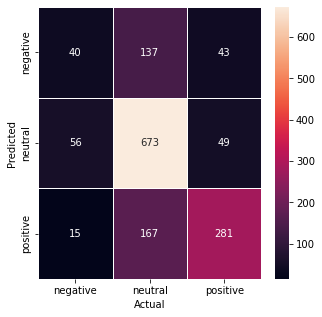

In [12]:
cf_matrix = pd.crosstab(levels[y_valid],levels[y_pred])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')